In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import sklearn
import pandas as pd
from sklearn import model_selection, linear_model



In [2]:
#load data 
data = pd.read_csv('data/hour.csv', sep=',', header=0,)
#convert to numpy array
data_array = np.array(data)
#data_array.shape

In [3]:
# # splitting training and testing data (features)
X = data_array[:,:-3]
# remove date column (second column)
X = np.delete(X, 1, 1) 
# splitting training and testing data (targer)
y_casual = data_array[:,-3]
y_registered = data_array[:,-2]
y_cnt = data_array[:,-1]

In [4]:
# split the data for training 
X_train, X_test, y_cnt_train, y_cnt_test = model_selection.train_test_split(X, y_cnt, test_size=0.2)
y_cnt_train = y_cnt_train[:,np.newaxis]
y_cnt_test = y_cnt_test[:,np.newaxis]

print(X_train.shape, X_test.shape,y_cnt_train.shape, y_cnt_test.shape )



(13903, 13) (3476, 13) (13903, 1) (3476, 1)


In [5]:
# idk why but we need to change type even thou type(y_cnt) output is the same before and after 
# but it fixes following error 
# ValueError: Unknown label type: 'unknown'
y_cnt_train=y_cnt_train.astype('int')
y_cnt_test=y_cnt_test.astype('int')


In [6]:

regr = linear_model.LinearRegression()# fit classifier 
regr.fit(X_train, y_cnt_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
# # The coefficients
print('Coefficients:', regr.coef_)
# # The mean square error
# print("Residual sum of squares: %.2f"
#       % np.mean((regr.predict(X_test) - y_cnt_test) ** 2))
# # Explained variance score: 1 is perfect prediction
# print('Variance score: %.2f' % regr.score(X_test, y_cnt_test))


Coefficients: [[ -5.69301521e-03   1.94763251e+01   1.32381724e+02   4.33089021e+00
    7.62722549e+00  -2.44522675e+01   2.28567699e+00   4.46431204e+00
   -2.27816224e+00   9.00852082e+01   2.20603763e+02  -1.98340896e+02
    4.46175052e+01]]


In [8]:
#select the best feature based on coeficient
feature_column = np.argmax(regr.coef_)
print(feature_column)

10


In [9]:
# split the data to use just one feature with the highest coeficient
X_train =  X_train[:,feature_column]
X_test = X_test[:,feature_column]

X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

In [10]:
# print (X_train.shape)
# print (X_test.shape)

# print (y_cnt_train.shape)
# print (y_cnt_test.shape)

In [11]:
# do regression just for one feature
regr = linear_model.LinearRegression()# fit classifier 
regr.fit(X_train, y_cnt_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# The coefficients and scores 
print('Coefficients:', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_cnt_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_cnt_test))


Coefficients: [[ 427.28343405]]
Residual sum of squares: 27286.53
Variance score: 0.15


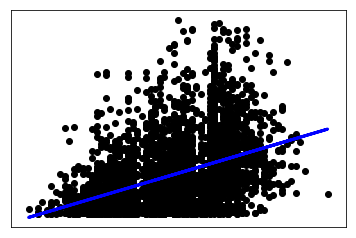

In [13]:
#visualize w/plot 

# Plot outputs
plt.scatter(X_test, y_cnt_test,  color='black')
plt.plot(X_test, regr.predict(X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()